Business case
Claim related fraud is a huge problem in the insurance industry. It is quite  difficult to identify those unwanted claims I am trying to troubleshoot and help the General Insurance industry with this problem.
The data that I have is from Automobile Insurance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams
%matplotlib inline


Importing csv file 

In [2]:
data = pd.read_csv('insurance_claims.csv')

In [3]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
data.shape

(1000, 40)

In [6]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

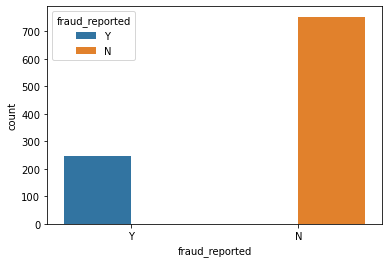

In [8]:
ax= sns.countplot(x='fraud_reported', data=data, hue='fraud_reported')

In [9]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [10]:
data['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

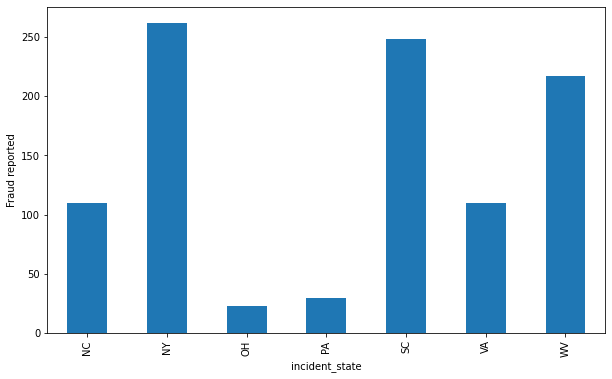

In [11]:
fig = plt.figure(figsize=(10,6))
ax = data.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

In above graph we can see the total reported case from different states where maxmimum reported case are from New york and South Carolina


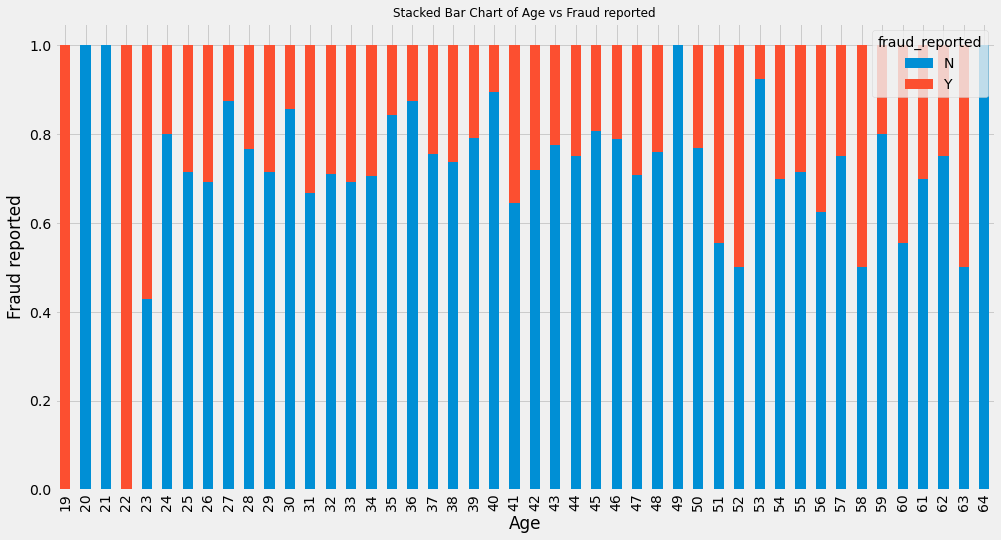

In [12]:

plt.rcParams['figure.figsize']=[15,8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(data.age, data.fraud_reported)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked Bar Chart of Age vs Fraud reported', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Fraud reported')
plt.show()


From above plot, it is obvious that, age is an important predictor for fraud reported. Age between 19-23 shows substantial number of fraud report.

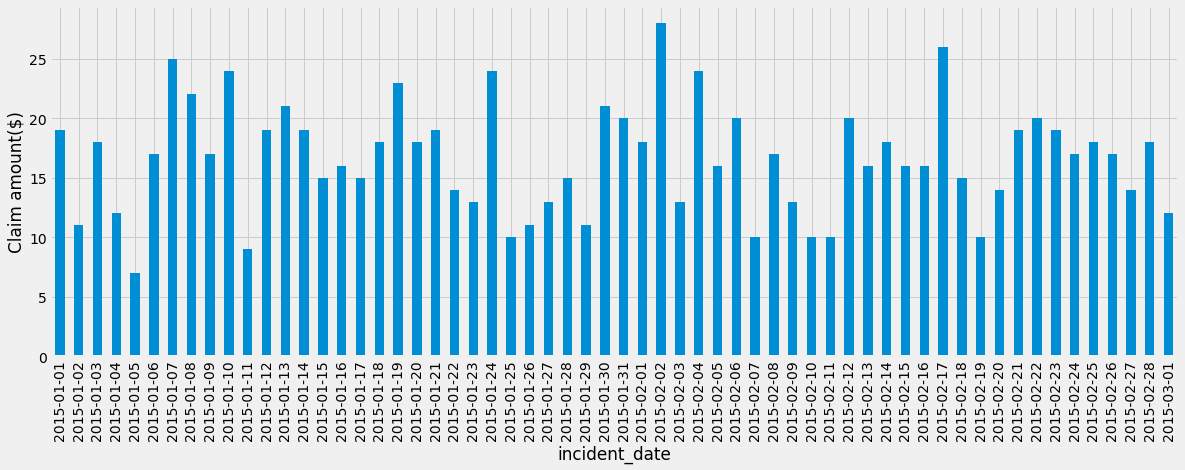

In [13]:

fig=  plt.figure(figsize=(18,6))
ax= data.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount($)')
plt.show()

We see that, all the cases in above plot are for the months of January and February 2015

In [68]:
data['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

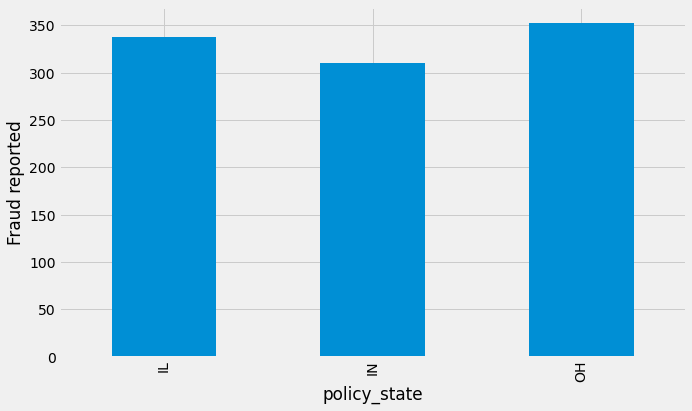

In [14]:

fig = plt.figure(figsize=(10,6))
ax = data.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

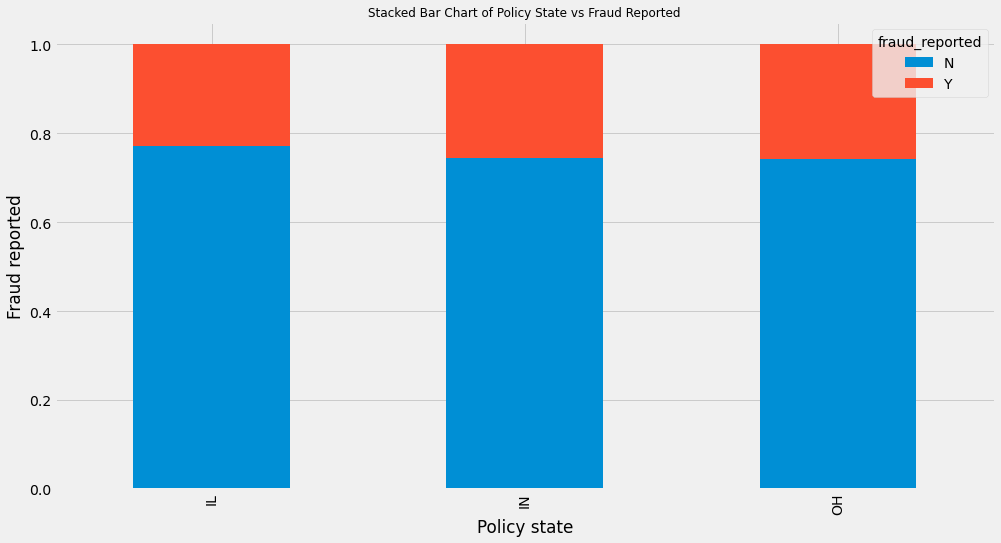

In [16]:

table=pd.crosstab(data.policy_state, data.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Policy State vs Fraud Reported', fontsize=12)
plt.xlabel('Policy state')
plt.ylabel('Fraud reported')
plt.show()


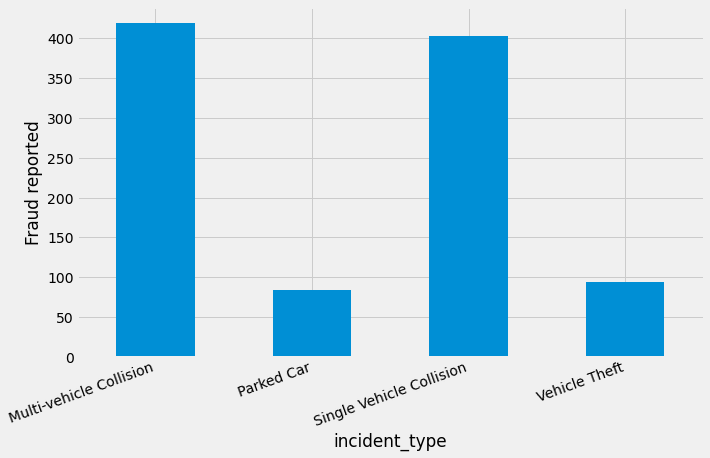

In [69]:


fig= plt.figure(figsize=(10,6))
ax=data.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

Above chart shows that single vehicle collision and multi vehicle collsion number are more than parked car and vehicle theft

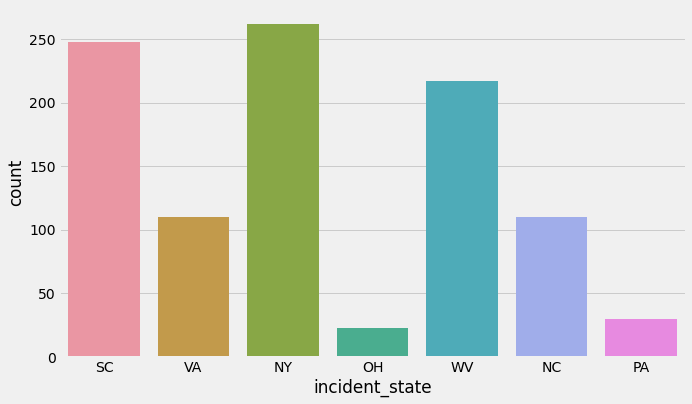

In [19]:

fig= plt.figure(figsize=(10,6))
ax=sns.countplot(x='incident_state', data=data)

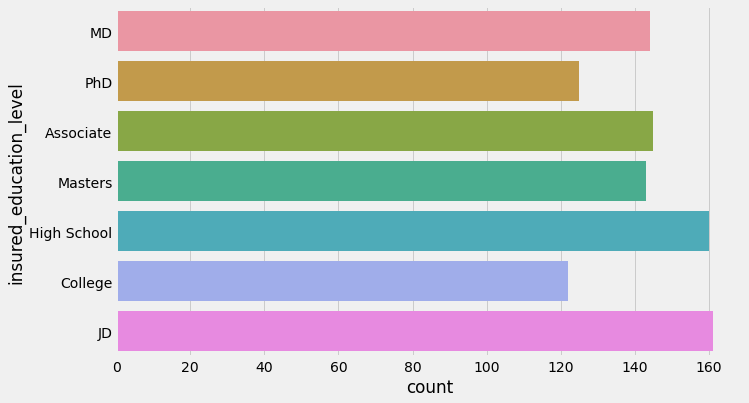

In [21]:

fig=plt.figure(figsize=(10,6))
ax =sns.countplot(y= 'insured_education_level',data=data)
plt.show()

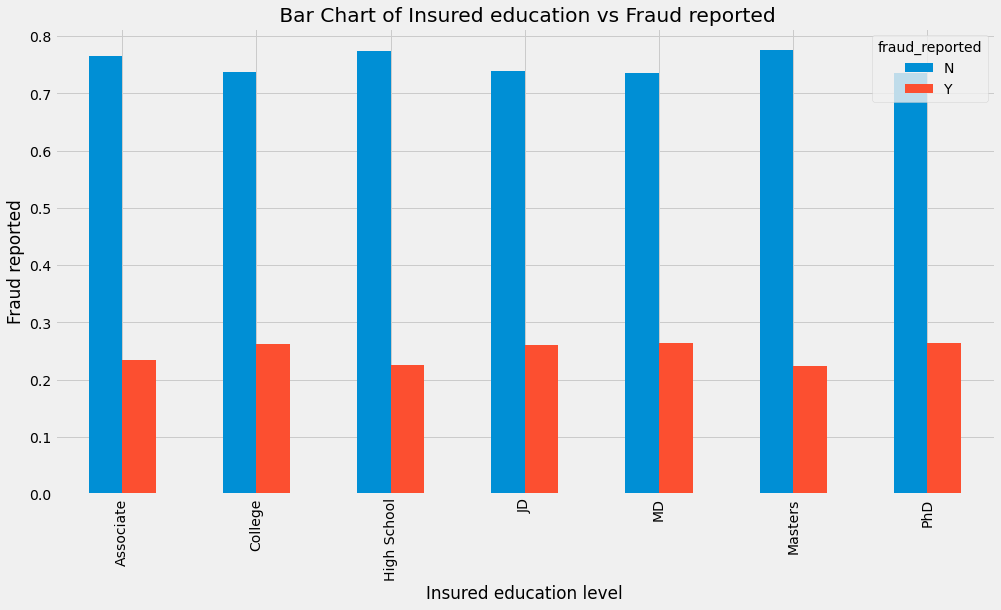

In [70]:


table= pd.crosstab(data.insured_education_level, data.fraud_reported)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar')
plt.title(' Bar Chart of Insured education vs Fraud reported')
plt.xlabel('Insured education level')
plt.ylabel('Fraud reported')

plt.show()

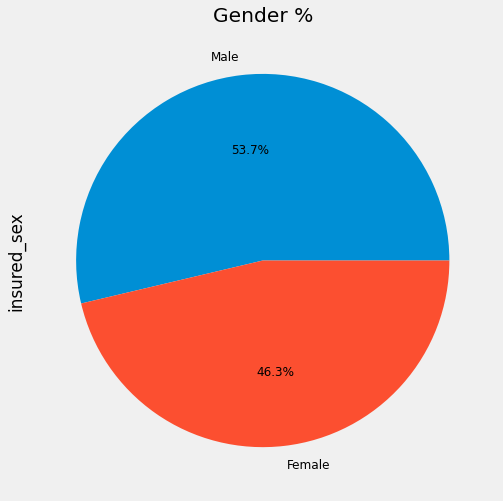

In [32]:
ax = (data['insured_sex'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('Gender %')
plt.show()


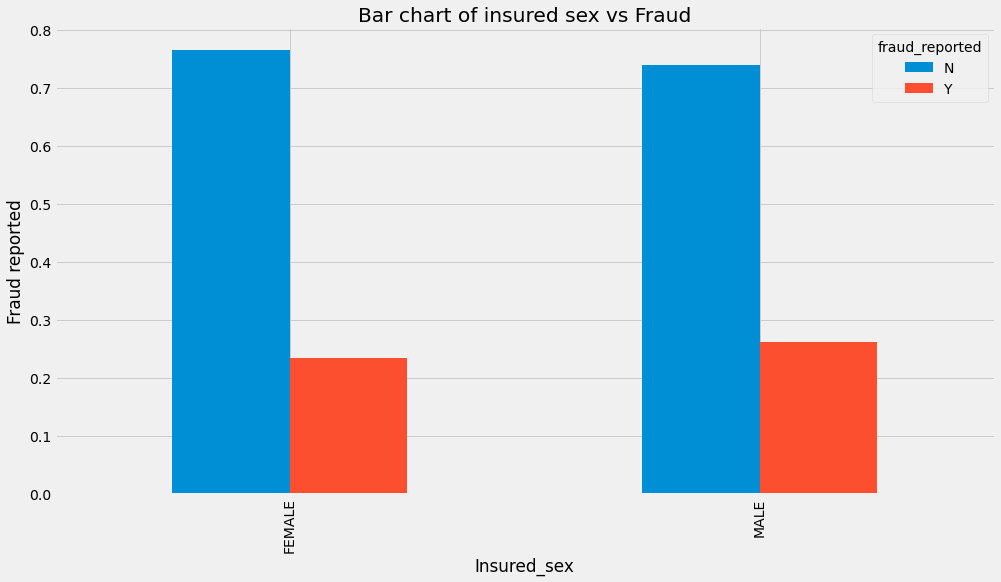

In [72]:

table=pd.crosstab(data.insured_sex,data.fraud_reported)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar')
plt.title('Bar chart of insured sex vs Fraud')
plt.xlabel('Insured_sex')
plt.ylabel('Fraud reported')
plt.show()

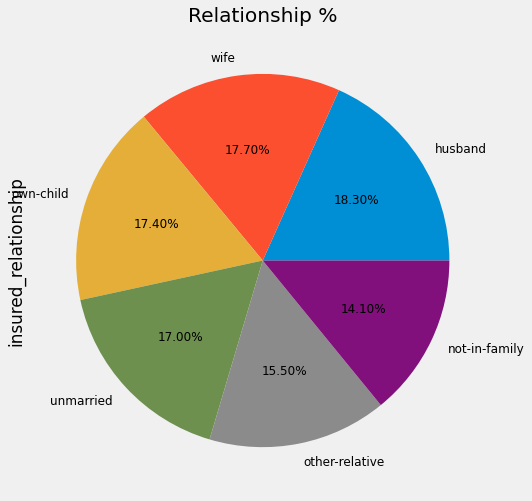

In [48]:
ax = (data['insured_relationship'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%2.2f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('Relationship %')
plt.show()

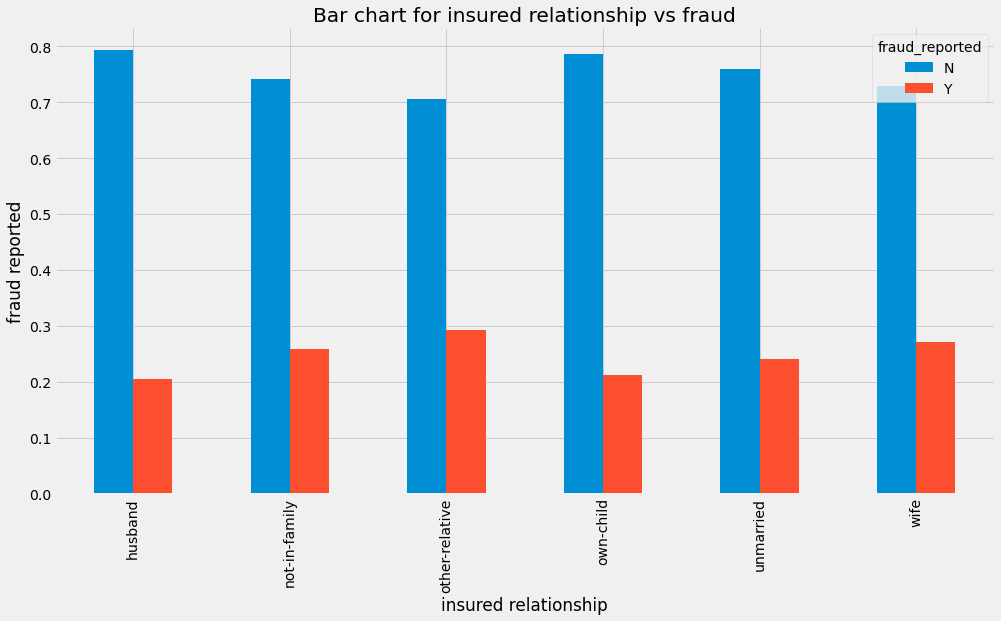

In [51]:

table=pd.crosstab(data.insured_relationship, data.fraud_reported)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar')
plt.title('Bar chart for insured relationship vs fraud')
plt.xlabel('insured relationship')
plt.ylabel('fraud reported')
plt.show()

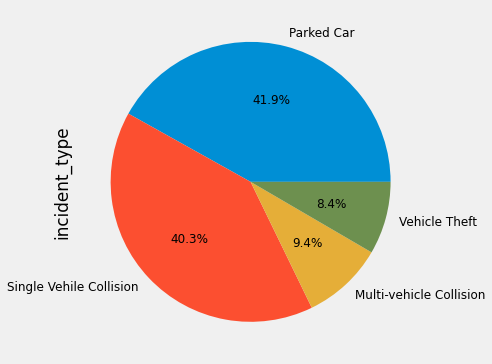

In [52]:
fig = plt.figure(figsize=(10,6))
ax = (data['incident_type'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%2.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12) 

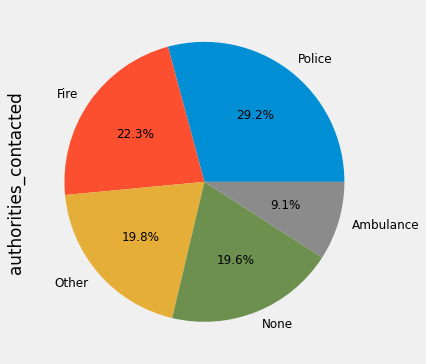

In [53]:
fig = plt.figure(figsize=(10,6))
ax = (data['authorities_contacted'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%2.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12) 

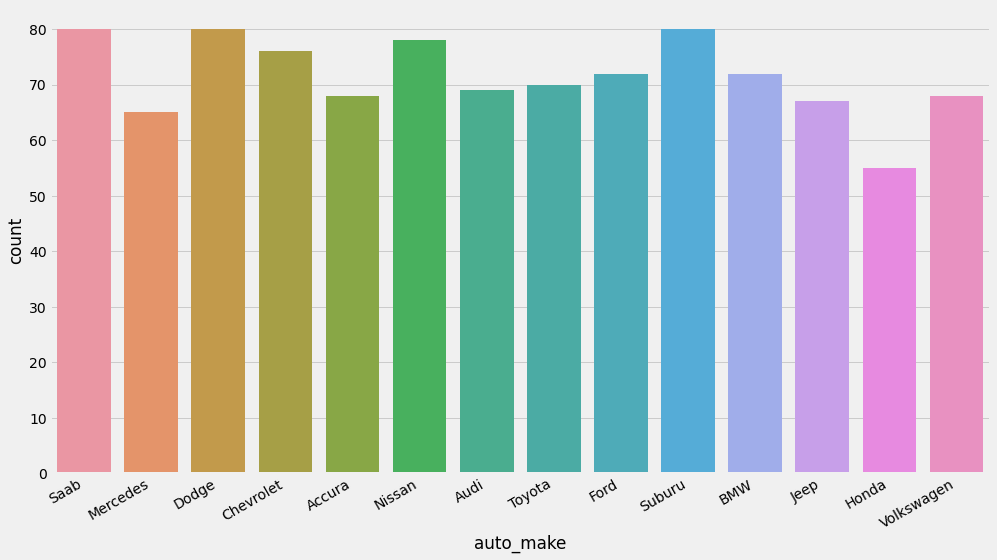

In [57]:

ax=sns.countplot(x='auto_make',data= data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha ="right")
plt.show()

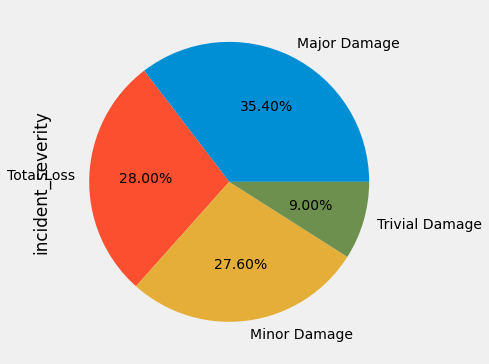

In [60]:

fig = plt.figure(figsize=(10,6))
ax = (data['incident_severity']. value_counts()*100/len(data))\
.plot.pie(autopct='%2.2f%%',labels = [ 'Major Damage','Total Loss','Minor Damage','Trivial Damage'])

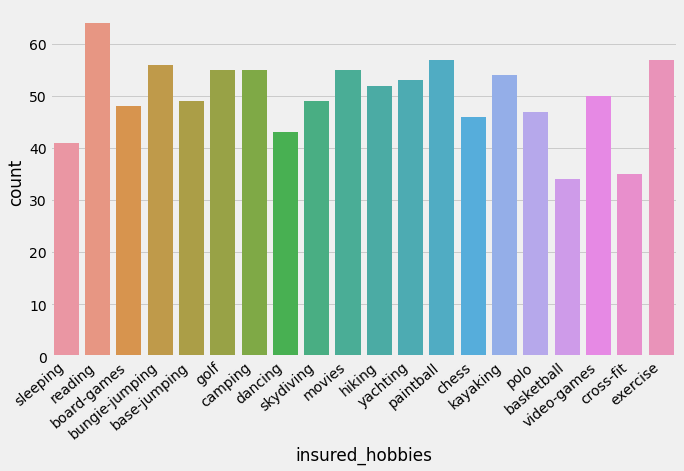

In [61]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [63]:
data["insured_occupation"].value_counts() 

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

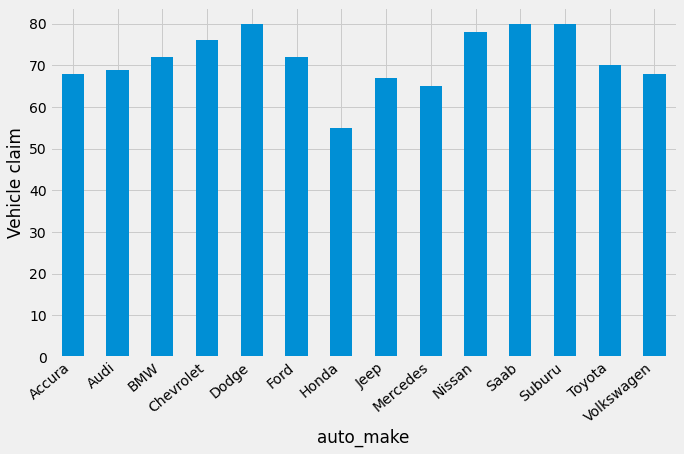

In [64]:

fig = plt.figure(figsize=(10,6))
ax= data.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()


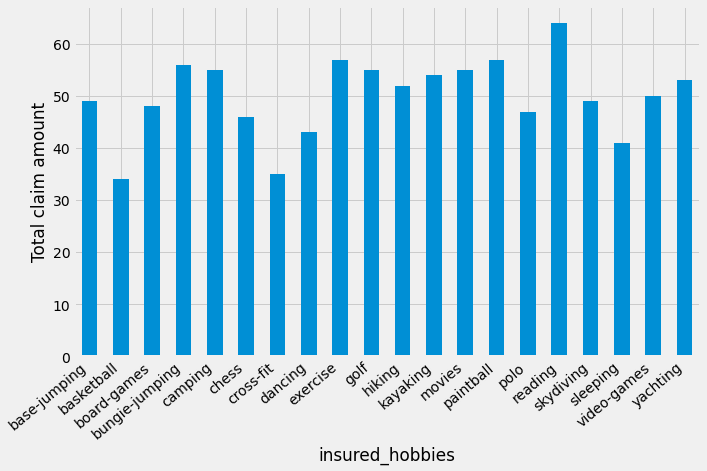

In [65]:

fig = plt.figure(figsize=(10,6))
ax= data.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total claim amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()